# COS 475/575 – Machine Learning - Homework #4
## Tristan Zippert
### Help Recieved: Matt Virgin, Allison Lupien

subgradient and stochastic subgradient methods for minimizing the convex but nondifferentiable function:
<div class="math">
\begin{equation}
    J(w,b)= \frac{1}{n}\sum^n_{i=1}L(y_{i},w^{T}x_{i}+b)+\frac{\lambda}{2}||w||^{2}\\
    \text{where L(y, t) = max{0, 1 − yt} is the hinge loss.}
\end{equation}
</div>

#### Imports

In [16]:
import numpy as np
import scipy.io as sio
np.random.seed(0) 
np.random.permutation

<function RandomState.permutation>

#### Loading data

In [2]:
nuclear = sio.loadmat("nuclear.mat")
lambda_ = 0.001
X = nuclear["x"]
Y = nuclear["y"]
X.shape,Y.shape

((2, 20000), (1, 20000))

In [3]:
Y

array([[ 1,  1, -1, ..., -1,  1,  1]], dtype=int16)

In [4]:
X

array([[0.64464422, 1.68921528, 3.44227343, ..., 0.89076224, 1.76915594,
        0.99243794],
       [0.20496921, 0.65038459, 0.56803649, ..., 0.16074721, 0.64784031,
        0.34081428]])

#### Given subgradient function

In [5]:
def subg(w,b,x,y,lam,n):
    #credit: from Allison Lupien and Professor Salimeh
    #print (w. shape, x. shape, b, w.dot(x))
    if((1.0-y*(w.dot(x)+b)) > 0):
        u = np.concatenate([-1./n * (y*x - lambda_*w), -1./n*y], axis = 0)
    else:
        u = np.concatenate([1./20000 * lambda_*w, np.array([0])], axis = 0)
    return u

In [6]:
def h_loss(x,y,w,b,lambda_):
    hinge = np.maximum(0, 1.0 - y*(w.dot(x) + b))
    return np.mean(hinge) + 0.5 * lambda_ * np.linalg.norm(w)**2

In [7]:
def gradient_func(X,Y,lambda_,K):
    d, n = X.shape
    theta = np.random.rand(3)
    w = np.random.rand(d)
    b = 0
    arr_theta = []
    u = np.zeros(3)
    for j in range(1,K+1):
        step_size = 100/(j)
        for i in range(n):
            u += subg(w, b, X[:,i], Y[:,i], lambda_, n)
        theta -= step_size * u
        w -= u[:2]
        b -= u[2]
        
        J = h_loss(X,Y,w,b,lambda_)

        arr_theta.append(J)
    return (w,b,arr_theta)

In [8]:
ls = gradient_func(X,Y,lambda_,100)

#### Graphing

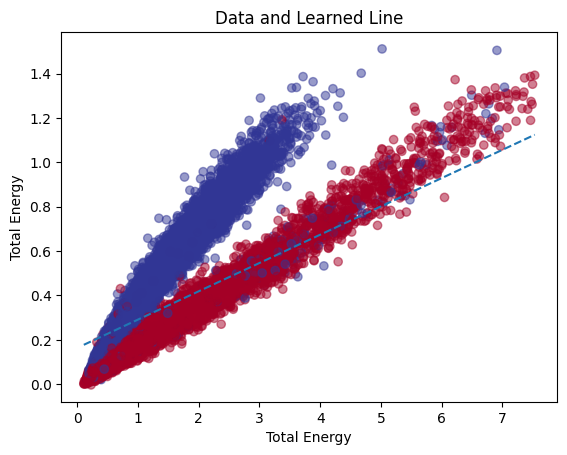

In [9]:
import matplotlib.pyplot as plt

def graph(X,Y,ls):
    axis_x_min = np.min(X[0])
    axis_x_max = np.max(X[0])

    pred_line_x = np.linspace(axis_x_min, axis_x_max, 100)
    pred_line_y = -( ls[0][0] * pred_line_x + ls[1] ) / ls[0][1]

    plt.scatter(X[0], X[1], c=Y, cmap='RdYlBu', marker="o", alpha=0.5)

    plt.plot(pred_line_x, pred_line_y, linestyle='--')

    plt.xlabel('Total Energy')
    plt.ylabel('Total Energy')
    plt.title('Data and Learned Line')

    plt.show()
graph(X,Y,ls)

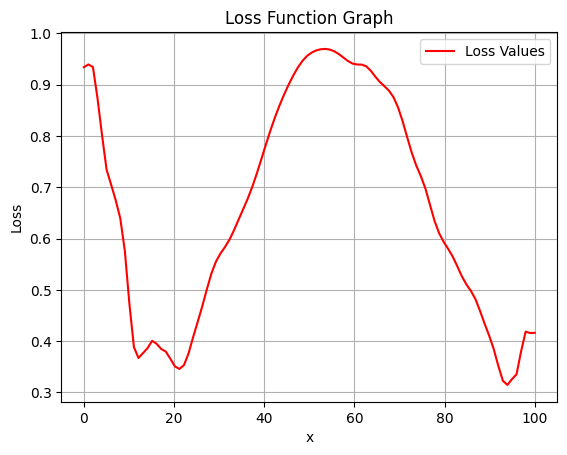

In [10]:
def loss_graph(loss_values):
    
    fig, ax = plt.subplots()
    x_line = np.linspace(0, 100, len(loss_values))
    ax.plot(x_line, loss_values, label='Loss Values', color='red')

    ax.set_xlabel('x')
    ax.set_ylabel('Loss')
    ax.set_title('Loss Function Graph')
    ax.legend()
    plt.grid(True)
    plt.show()
loss_graph(ls[2])

### stochastic subgradient

In [15]:
def stochastic_gradient_func(X,Y,lambda_,K):
    d, n = X.shape
    theta = np.random.rand(3)
    w = np.random.rand(d)
    b = 0
    arr_theta = []
    u = np.zeros(3)
    for j in range(1,K+1):
        step_size = 100/(j)
        for i in range(n):
            idx = np.random.randint(n) 
            u += subg(w, b, X[:,idx], Y[:,idx], lambda_, n)
        theta -= step_size * u
        w -= u[:2]
        b -= u[2]
        
        J = h_loss(X,Y,w,b,lambda_)

        arr_theta.append(J)
    return (w,b,arr_theta)

In [12]:
sc = stochastic_gradient_func(X,Y,lambda_,100)

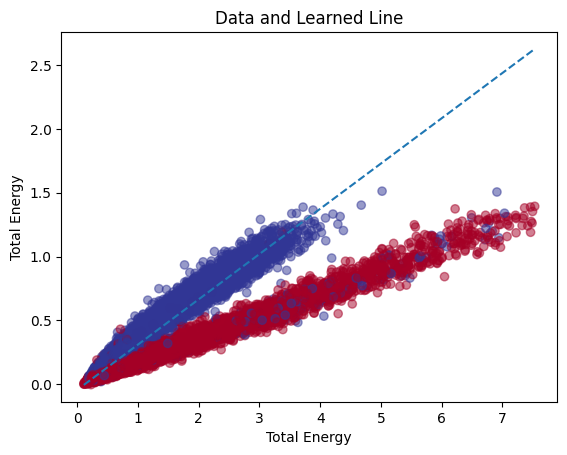

In [13]:
graph(X,Y,sc)

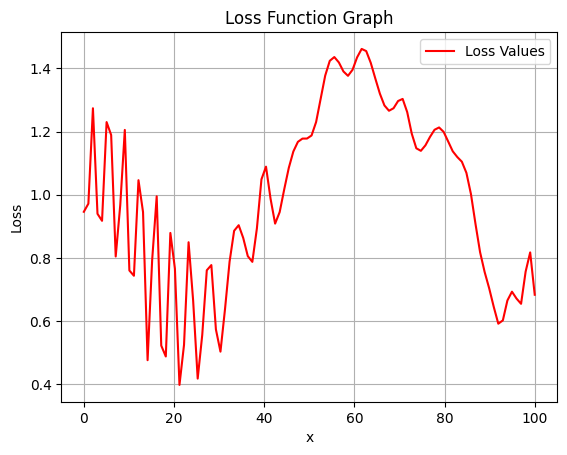

In [14]:
loss_graph(sc[2])